In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter
import os

cwd = os.getcwd()

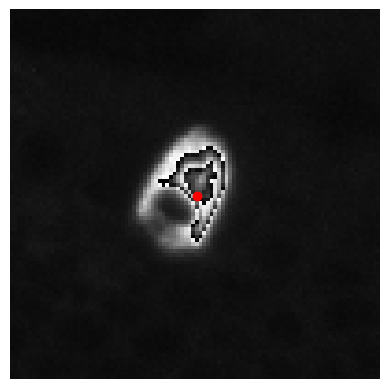

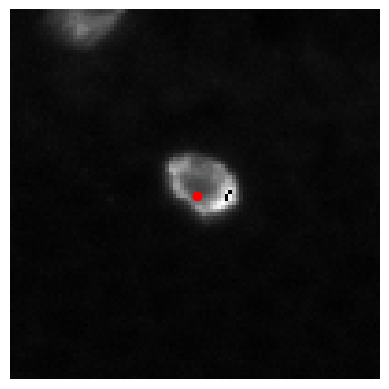

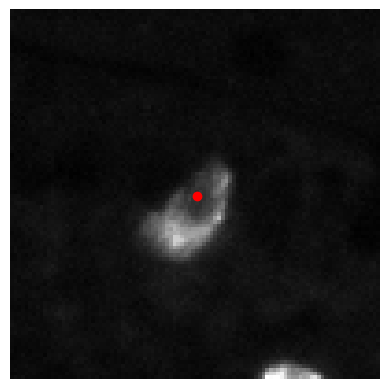

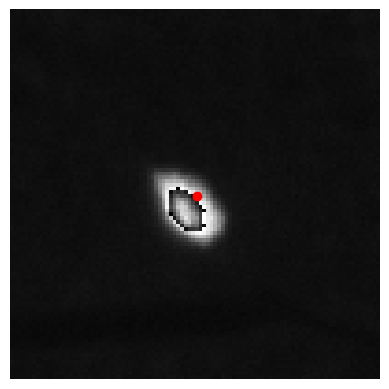

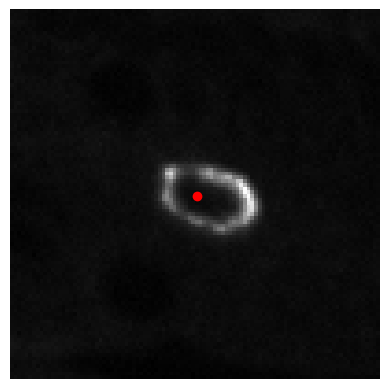

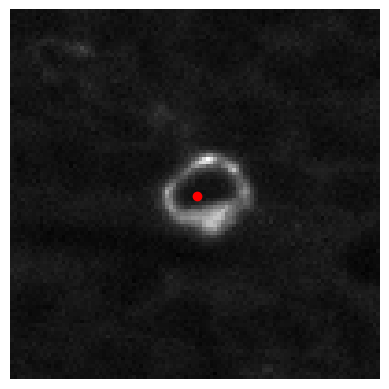

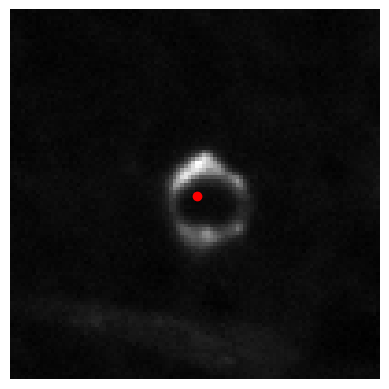

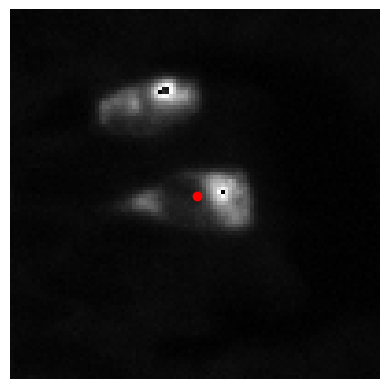

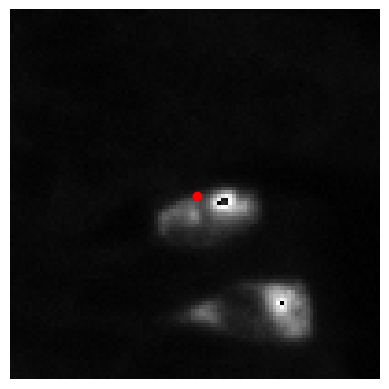

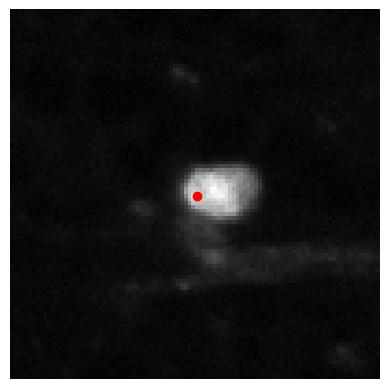

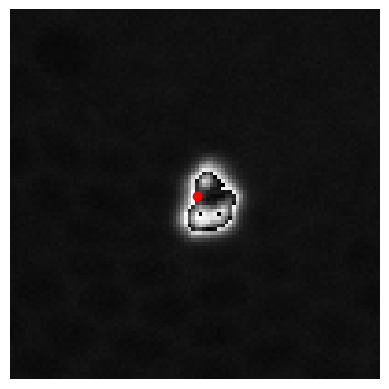

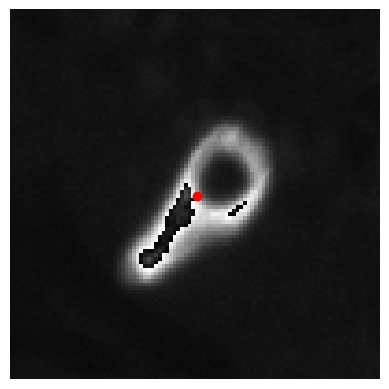

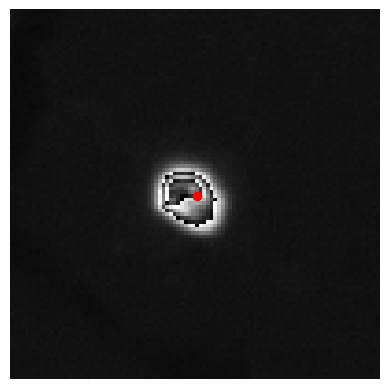

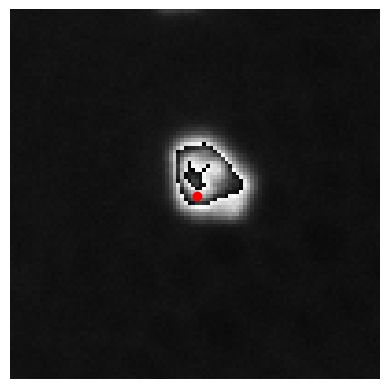

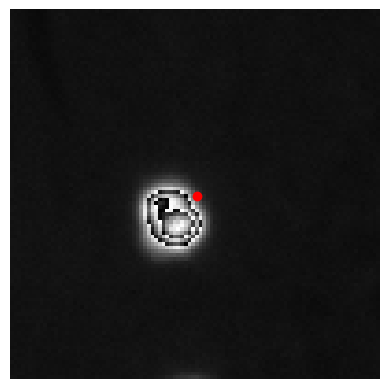

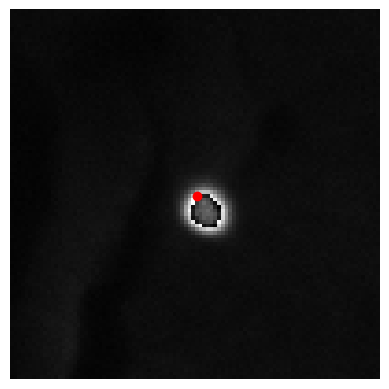

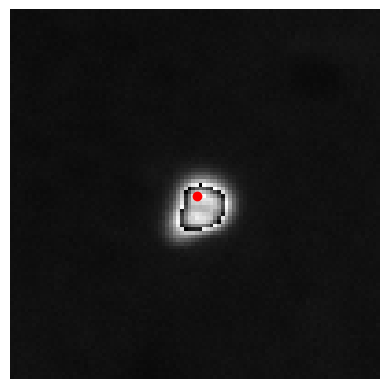

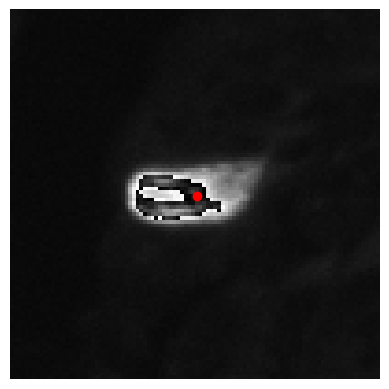

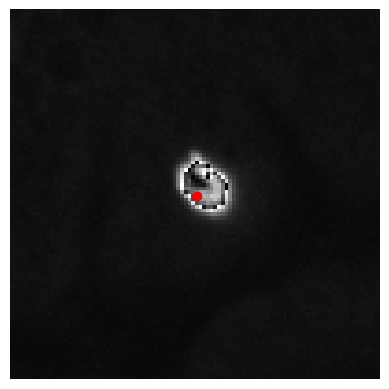

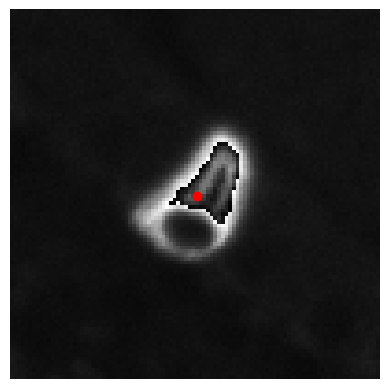

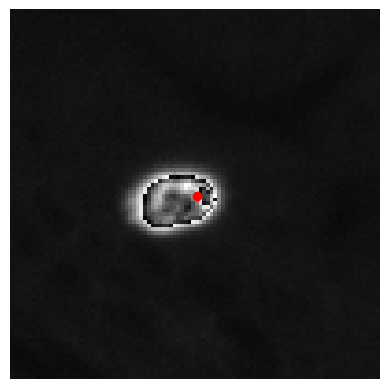

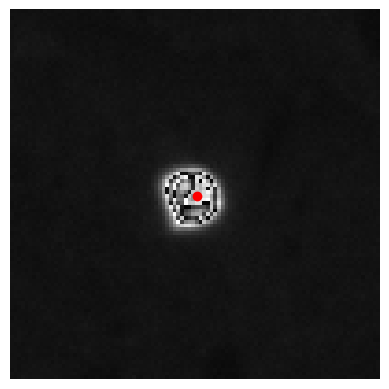

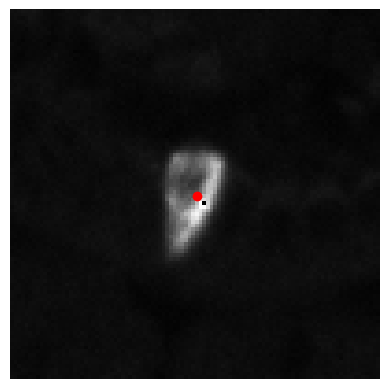

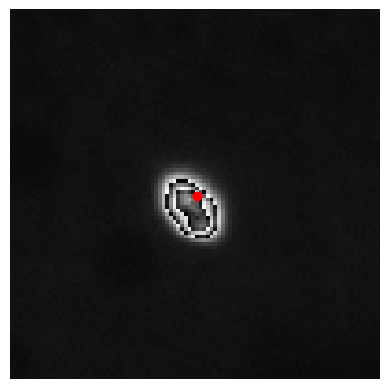

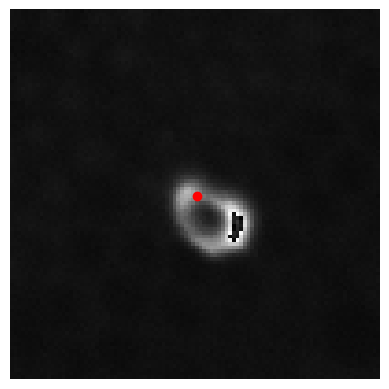

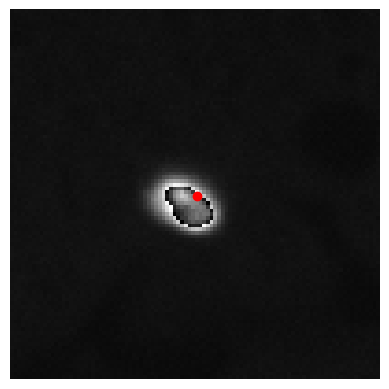

In [28]:
for i in range(0, 26):
    if i < 10:
        i = f'0{i}'
    else:
        i = str(i)
    patch = np.load(cwd+f'/data/patches/01_6/01_6_00{i}.npy')
    coords = pd.read_csv(cwd+f'/data/patches/01_6/01_6_00{i}_coords.csv').values

    plt.imshow(patch, cmap='gray')
    for x, y in coords:
        plt.plot(x, y, 'ro')
    plt.axis('off')
    plt.show()


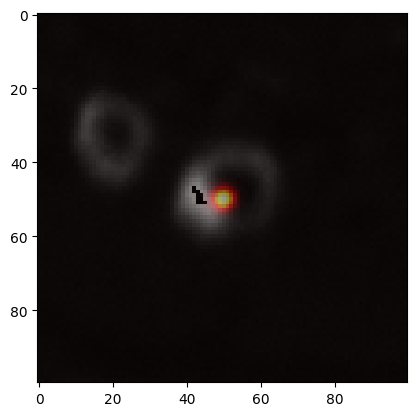

In [19]:
def generate_heatmap(shape, points, sigma=2):
    heatmap = np.zeros(shape, dtype=np.float32)
    for x, y in points:
        if 0 <= x < shape[1] and 0 <= y < shape[0]:
            heatmap[int(y), int(x)] = 1.0  # y = Zeile, x = Spalte
    return gaussian_filter(heatmap, sigma=sigma)

patch = np.load('data/patches/patch_0002.npy')
shape = patch.shape

df = pd.read_csv('data/patches/patch_0002_coords.csv')
points = df[['x', 'y']].values

heatmap = generate_heatmap(shape, points, sigma=2)
plt.imshow(patch, cmap='gray')
plt.imshow(heatmap, alpha=0.5, cmap='hot')
plt.show()